In [133]:
import pandas as pd
import re
import numpy as np

In [12]:
from matplotlib import pyplot as plt


In [13]:
sample_data = pd.read_csv('Stage2Final.csv')

In [14]:
sample_data


,Unnamed: 0,color,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,...,budget,title_year,imdb_score,aspect_ratio,director_avg_gross,director_avg_score,director_movies,actor_average_score,actor_average_gross,actor_movies
0,0,Color,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,...,237000000.0,2009.0,7.9,1.78,2.298440e+08,7.880000,5,4.892593,4.732852e+07,12
1,1,Color,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,...,300000000.0,2007.0,7.1,2.35,2.019249e+08,7.025000,4,4.006614,9.171841e+07,32
2,3,Color,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,...,250000000.0,2012.0,8.5,2.35,1.961842e+08,8.383333,6,5.126667,8.834414e+07,30
3,5,Color,Andrew Stanton,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,...,263700000.0,2012.0,6.6,2.35,3.023229e+08,8.300000,2,2.877778,1.814062e+07,5
4,6,Color,Sam Raimi,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,Kirsten Dunst,...,258000000.0,2007.0,6.2,2.35,1.659354e+08,7.300000,5,4.454630,7.490591e+07,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,5015,Black and White,Richard Linklater,100.0,Richard Linklater,1227508.0,Comedy|Drama,Tommy Pallotta,Slacker,Jean Caffeine,...,23000.0,1991.0,7.1,1.37,0.000000e+00,0.000000,0,0.000000,0.000000e+00,0
2992,5025,Color,John Waters,108.0,Mink Stole,180483.0,Comedy|Crime|Horror,Divine,Pink Flamingos,Edith Massey,...,10000.0,1972.0,6.1,1.37,0.000000e+00,0.000000,0,0.000000,0.000000e+00,0
2993,5033,Color,Shane Carruth,77.0,David Sullivan,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,Casey Gooden,...,7000.0,2004.0,7.0,1.85,0.000000e+00,0.000000,0,0.000000,0.000000e+00,0
2994,5035,Color,Robert Rodriguez,81.0,Peter Marquardt,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Consuelo Gómez,...,7000.0,1992.0,6.9,1.37,0.000000e+00,0.000000,0,0.000000,0.000000e+00,0


In [15]:
df_merged = pd.read_csv('Stage2Final.csv')

In [16]:
df_merged['Weighted Average Review'] = (df_merged['director_avg_gross'] + 2*df_merged['actor_average_gross'])/2
df_merged.head()

,Unnamed: 0,color,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,...,title_year,imdb_score,aspect_ratio,director_avg_gross,director_avg_score,director_movies,actor_average_score,actor_average_gross,actor_movies,Weighted Average Review
0,0,Color,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,...,2009.0,7.9,1.78,2.298440e+08,7.880000,5,4.892593,4.732852e+07,12,1.622505e+08
1,1,Color,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,...,2007.0,7.1,2.35,2.019249e+08,7.025000,4,4.006614,9.171841e+07,32,1.926809e+08
2,3,Color,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,...,2012.0,8.5,2.35,1.961842e+08,8.383333,6,5.126667,8.834414e+07,30,1.864363e+08
3,5,Color,Andrew Stanton,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,...,2012.0,6.6,2.35,3.023229e+08,8.300000,2,2.877778,1.814062e+07,5,1.693021e+08
4,6,Color,Sam Raimi,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,Kirsten Dunst,...,2007.0,6.2,2.35,1.659354e+08,7.300000,5,4.454630,7.490591e+07,33,1.578736e+08


In [18]:

df_yearagg = df_merged.groupby('title_year').size().reset_index(name = 'n')
df_yearagg.head()

,title_year,n
0,1929.0,1
1,1933.0,1
2,1935.0,1
3,1936.0,1
4,1937.0,1


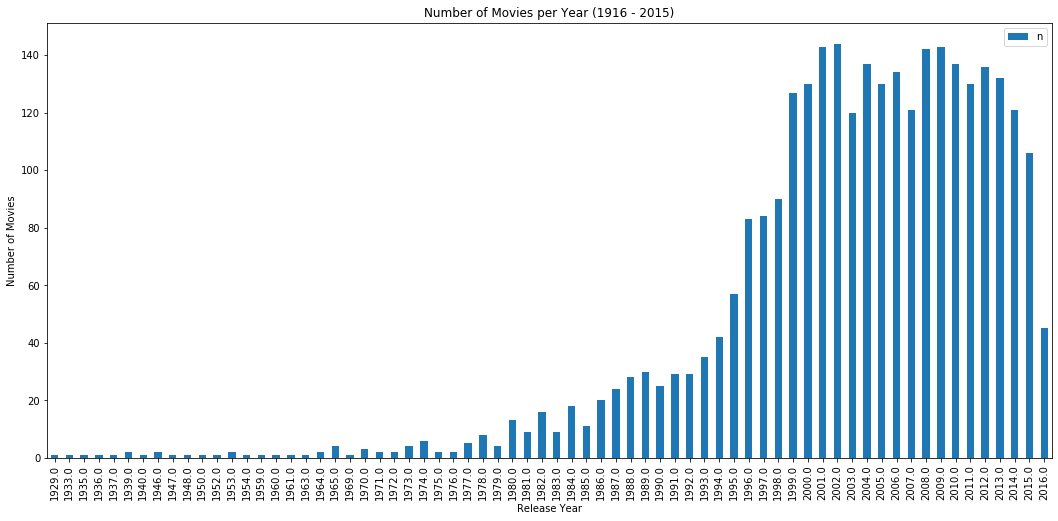

In [19]:

fig = plt.figure(figsize = (18,8))
ax = fig.add_subplot(111)

df_yearagg.plot(kind='bar', x='title_year', y='n', ax=ax)
ax.set_title('Number of Movies per Year (1916 - 2015)')
ax.set_ylabel('Number of Movies')
ax.set_xlabel('Release Year')
plt.show()

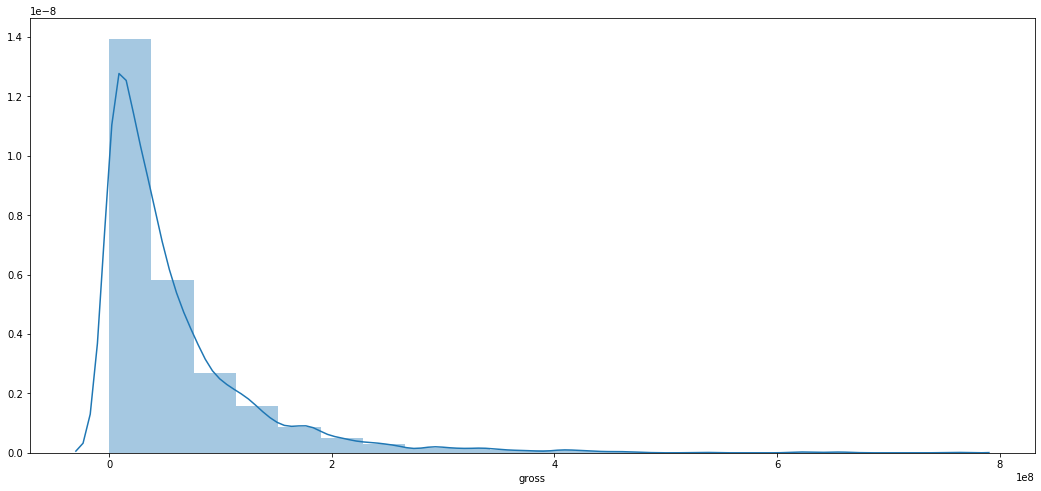

In [21]:
import seaborn as sns
fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot(111)

sns.distplot(df_merged['gross'], kde = True, bins = 20, ax = ax)
plt.add_ylabel = 'Number of Movies'
plt.add_xlabel = 'gross'
plt.show()

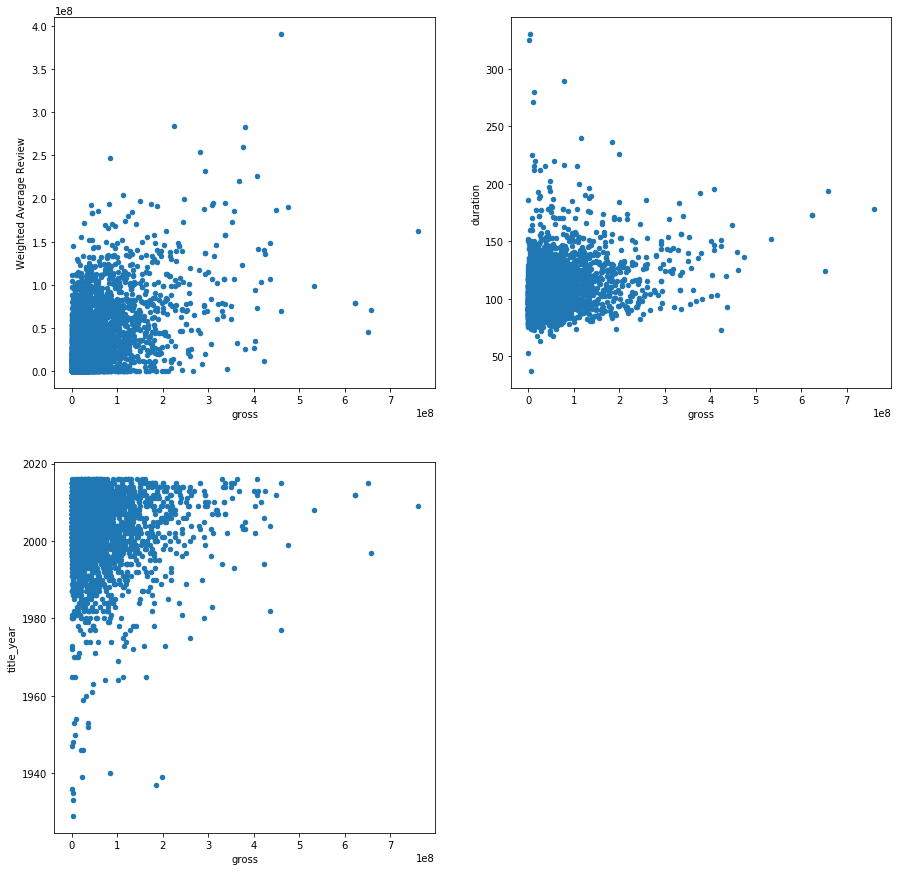

In [25]:

fig = plt.figure(figsize = (15, 15))

ax1 = fig.add_subplot(221)
df_merged.plot(kind = 'scatter', x = 'gross', y = 'Weighted Average Review', ax = ax1)

ax2 = fig.add_subplot(222)
df_merged.plot(kind = 'scatter', x = 'gross', y = 'duration', ax = ax2)

ax3 = fig.add_subplot(223)
df_merged.plot(kind = 'scatter', x = 'gross', y = 'title_year', ax = ax3)

In [69]:
genres_df = pd.DataFrame(data = {'Genres':df_merged['genres'], 'gross':df_merged['gross'], 'Weighted Average Review':df_merged['Weighted Average Review']})
genres_df.head()

,Genres,gross,Weighted Average Review
0,Action|Adventure|Fantasy|Sci-Fi,760505847.0,1.622505e+08
1,Action|Adventure|Fantasy,309404152.0,1.926809e+08
2,Action|Thriller,448130642.0,1.864363e+08
3,Action|Adventure|Sci-Fi,73058679.0,1.693021e+08
4,Action|Adventure|Romance,336530303.0,1.578736e+08


In [127]:
gen_work_df = pd.DataFrame(data = {'Genres':df_merged['genres']})
gen_final = []
for x in gen_work_df['Genres']:
    x = re.sub("[\{'id': [0-9]+ ",'',x)
    x = re.sub("\'",'',x)
    x = re.sub(" ",'',x)
    x = re.sub("\[",'',x)
    x = re.sub("\]",'',x)
    x = re.sub("\|",'',x)
    x = re.split(",",x)
   
    gen_final.append(x)
gen_final_df = pd.DataFrame()
gen_final_df['Genres'] = gen_final
gen_final_df.head()

,Genres
0,[ActionAdventureFantasySci-Fi]
1,[ActionAdventureFantasy]
2,[ActionThriller]
3,[ActionAdventureSci-Fi]
4,[ActionAdventureRomance]


In [114]:
gen_final_df['gross'] = df_merged['gross']
gen_final_df['Review'] = genres_df['Weighted Average Review']
gen_final_df.head()

,Genres,gross,Review
0,[ActionAdventureFantasySci-Fi],760505847.0,1.622505e+08
1,[ActionAdventureFantasy],309404152.0,1.926809e+08
2,[ActionThriller],448130642.0,1.864363e+08
3,[ActionAdventureSci-Fi],73058679.0,1.693021e+08
4,[ActionAdventureRomance],336530303.0,1.578736e+08


In [115]:
gross_by_genre = []
number_by_genre = []
review_by_genre = []

for genretypes in genres_list:
    gross_sum = 0
    review_sum = 0
    index = 0
    n = 0
    for genrearray in gen_final_df['Genres']:
        for genre in genrearray:
            if genre == genretypes:
                gross = gen_final_df['gross'][index]
                review = gen_final_df['Review'][index]
                gross_sum = gross_sum + gross
                review_sum = review_sum + review
                n = n + 1
        index = index + 1
    gross_by_genre.append(gross_sum)
    review_by_genre.append(review_sum)
    number_by_genre.append(n)

gross_by_genre = []
for genretypes in genres_list:
    gross_sum = 0
    index = 0
    for genrearray in gen_final_df['Genres']:
        for genre in genrearray:
            if genre == genretypes:
                gross = gen_final_df['gross'][index]
                review = gen_final_df['Review'][index]
                gross_sum = gross_sum + gross
                review_sum = review_sum + review
        index = index + 1
    gross_by_genre.append(gross_sum)

In [116]:
gen_rev_df = pd.DataFrame(data = {'Genres':genres_list, 'Total gross':gross_by_genre, 'Total Review':review_by_genre,'n':number_by_genre})
gen_rev_df['Average gross'] = gen_rev_df['Total gross'] / gen_rev_df['n']
gen_rev_df['Average Review'] = gen_rev_df['Total Review'] / gen_rev_df['n']
gen_rev_df.head()

,Genres,Total gross,Total Review,n,Average gross,Average Review
0,ActionAdventureFantasySci-Fi,3.560217e+09,1.377268e+09,12,2.966848e+08,1.147724e+08
1,ActionAdventureFantasy,3.358868e+09,1.725882e+09,24,1.399529e+08,7.191177e+07
2,ActionThriller,1.242062e+09,7.550767e+08,17,7.306249e+07,4.441628e+07
3,ActionAdventureSci-Fi,9.226869e+09,3.930418e+09,47,1.963164e+08,8.362591e+07
4,ActionAdventureRomance,7.291446e+08,3.766037e+08,3,2.430482e+08,1.255346e+08


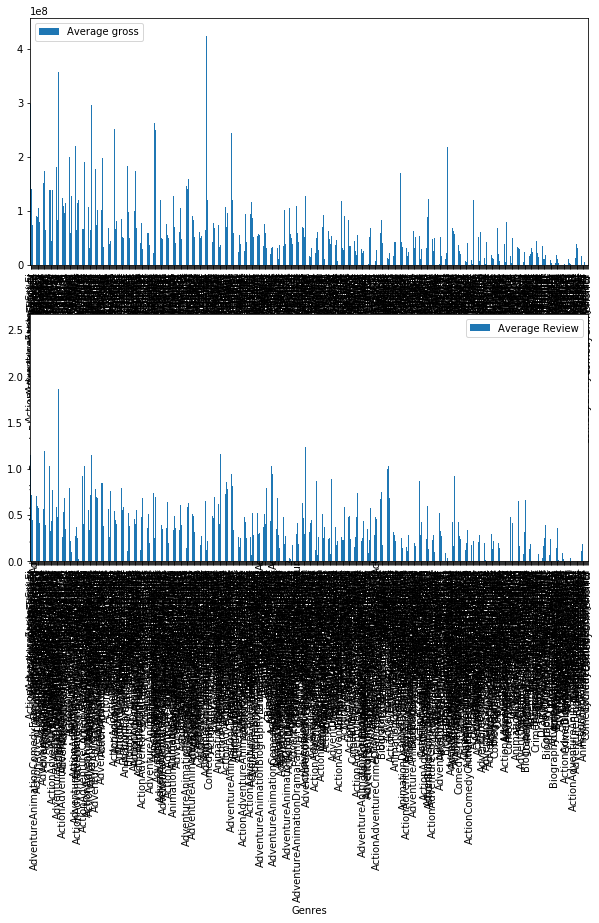

In [117]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
gen_rev_df.plot(kind='bar', x='Genres', y='Average gross', ax=ax1)
gen_rev_df.plot(kind='bar', x='Genres', y='Average Review', ax=ax2)

In [135]:
duration_df = pd.DataFrame(data = {'Duration':df_merged['duration'], 'Gross':df_merged['gross'],  'Weighted Average Review':df_merged['Weighted Average Review']})
duration_df.head()

,Duration,Gross,Weighted Average Review
0,178.0,760505847.0,1.622505e+08
1,169.0,309404152.0,1.926809e+08
2,164.0,448130642.0,1.864363e+08
3,132.0,73058679.0,1.693021e+08
4,156.0,336530303.0,1.578736e+08


In [136]:
new_duration_df = runtime_df.groupby('Duration').mean().reset_index()
new_duration_df.head()

,Duration,Gross,Weighted Average Review
0,37.0,5923044.0,0.000000e+00
1,53.0,274661.0,0.000000e+00
2,63.0,26687172.0,2.415422e+07
3,68.0,35974828.0,1.109518e+07
4,69.0,48092846.0,2.307001e+06


In [138]:
final_duration_df = new_runtime_df.groupby(pd.cut(new_duration_df['Duration'], np.arange(50, 350, 25))).mean().reset_index(drop=True)
final_duration_df

,Duration,Gross,Weighted Average Review
0,68.375000,5.824579e+07,1.619657e+07
1,88.000000,3.816664e+07,2.704155e+07
2,113.000000,5.842448e+07,4.209026e+07
3,138.000000,9.811720e+07,6.385978e+07
4,162.954545,1.497906e+08,6.038422e+07
5,187.550000,1.480505e+08,6.921972e+07
6,215.000000,4.032766e+07,4.781385e+07
7,234.000000,1.665770e+08,3.844783e+07
8,271.000000,1.076996e+07,6.655491e+06
9,284.500000,4.583528e+07,6.170423e+07


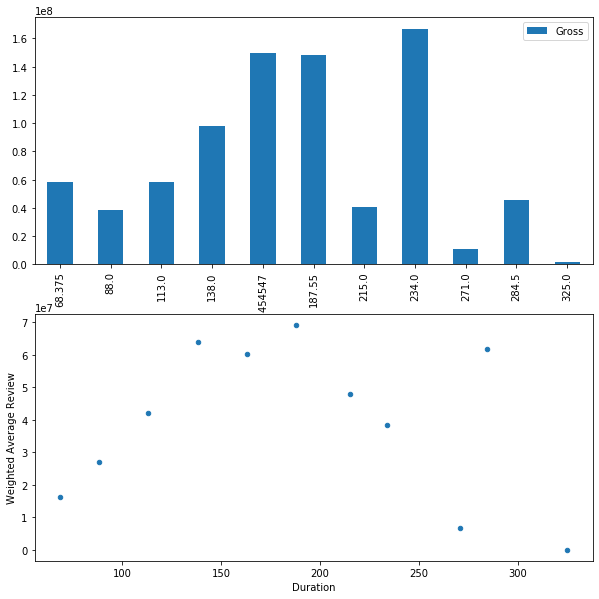

In [141]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
final_duration_df.plot(kind='bar', x='Duration', y='Gross', ax=ax1)
final_duration_df.plot(kind='scatter', x='Duration', y='Weighted Average Review', ax=ax2)

In [143]:
cast_movies_df = pd.DataFrame(data = {'Total Number of Movies of Actors':df_merged['actor_movies'], 'Gross':df_merged['gross'], 'Weighted Average Review':df_merged['Weighted Average Review']})
cast_movies_df.head()

,Total Number of Movies of Actors,Gross,Weighted Average Review
0,12,760505847.0,1.622505e+08
1,32,309404152.0,1.926809e+08
2,30,448130642.0,1.864363e+08
3,5,73058679.0,1.693021e+08
4,33,336530303.0,1.578736e+08


In [144]:
new_cast_movies_df = cast_movies_df.groupby('Total Number of Movies of Actors').mean().reset_index()
new_cast_movies_df.head()

,Total Number of Movies of Actors,Gross,Weighted Average Review
0,0,3.615917e+07,9.292156e+06
1,1,4.671209e+07,1.907684e+07
2,2,4.255190e+07,2.257253e+07
3,3,4.764959e+07,2.990569e+07
4,4,6.093353e+07,3.774280e+07


In [145]:
final_cast_movies_df = new_cast_movies_df.groupby(pd.cut(new_cast_movies_df['Total Number of Movies of Actors'], np.arange(0, 1000, 100))).mean().reset_index(drop=True)
final_cast_movies_df

,Total Number of Movies of Actors,Gross,Weighted Average Review
0,31.216667,9.015833e+07,7.840180e+07
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN


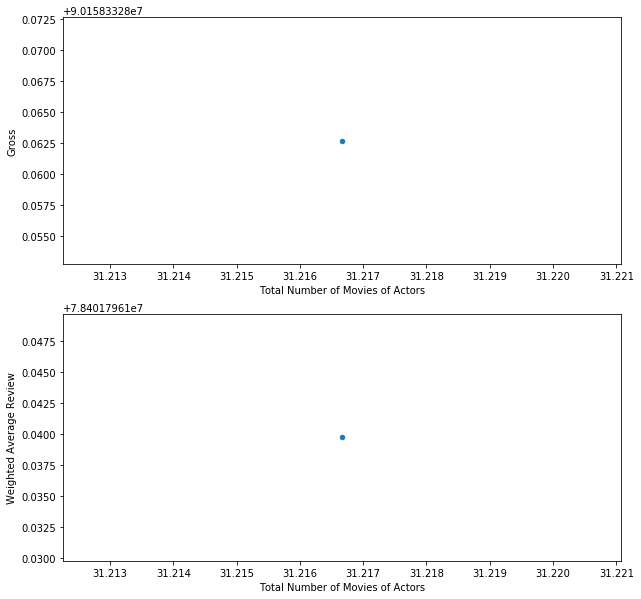

In [147]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
final_cast_movies_df.plot(kind='scatter', x='Total Number of Movies of Actors', y='Gross', ax=ax1)
final_cast_movies_df.plot(kind='scatter', x='Total Number of Movies of Actors', y='Weighted Average Review', ax=ax2)